In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("../input/datanew/heart_failure.csv")

In [3]:
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Death event counts checked

In [6]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

# To divide death counts in to two category 

In [7]:
data.loc[data['age'] <= 60, 'Age_category'] = 'Before_retire' 
data.loc[data['age'] > 60, 'Age_category'] = 'After_retire' 

print (data)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [8]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Age_category
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,After_retire
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Before_retire
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,After_retire
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Before_retire
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,After_retire


# we found death rate in162 people before the age of 60 and 137 people after the age of 60.

In [9]:
data['Age_category'].value_counts()

Before_retire    162
After_retire     137
Name: Age_category, dtype: int64

In [10]:
# pd.crosstab(data.DEATH_EVENT,data.Age_category)

Age_category,After_retire,Before_retire
DEATH_EVENT,,
0,85,118
1,52,44


# More people have died after the age of 60 due to Heart faliure

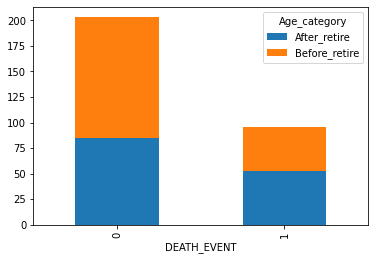

In [11]:
# pd.crosstab(data.DEATH_EVENT,data.Age_category).plot(kind='bar', stacked=True)
           
           

In [12]:
data_new= data.drop('Age_category',axis=1)

In [13]:

x =  data_new.drop('DEATH_EVENT',axis=1)
y= data_new['DEATH_EVENT']

In [14]:
from sklearn.preprocessing import StandardScaler


In [15]:
# scaler = StandardScaler()
# scaler_data= scaler.fit_transform(x)
# scaler_data

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

In [16]:
# x_s= pd.DataFrame(scaler_data,columns=x.columns[:])

In [17]:
# x_s.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_sTrain,x_sTest,y_Train,y_Test = train_test_split(x,y,test_size=.30,random_state=0)

# Model 1 - Logistic Regression

In [20]:
# from sklearn.linear_model import LogisticRegression
# logmodel= LogisticRegression()


In [21]:
# logmodel.fit(x_sTrain,y_Train)

LogisticRegression()

In [22]:
# Predction = logmodel.predict(x_sTest)

In [23]:
# from sklearn.metrics import classification_report,confusion_matrix

In [24]:
# print(classification_report(y_Test,Predction))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        62
           1       0.79      0.54      0.64        28

    accuracy                           0.81        90
   macro avg       0.80      0.74      0.76        90
weighted avg       0.81      0.81      0.80        90



In [25]:
# print(confusion_matrix(y_Test,Predction))

[[58  4]
 [13 15]]


# Model 2 - Decision Tree

In [26]:
# from sklearn.tree import DecisionTreeClassifier

In [27]:
# dtree = DecisionTreeClassifier()

In [28]:
# dtree.fit(x_sTrain,y_Train)

DecisionTreeClassifier()

In [29]:
# predict_1 = dtree.predict(x_sTest)

In [30]:
# print(classification_report(y_Test,predict_1))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        62
           1       0.64      0.64      0.64        28

    accuracy                           0.78        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.78      0.78      0.78        90



In [31]:
# print(confusion_matrix(y_Test,predict_1))

[[52 10]
 [10 18]]


## Using KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

## create  a KNN model with neighbors =1

In [33]:
knn =KNeighborsClassifier(n_neighbors=1)

In [34]:
knn.fit(x_sTrain,y_Train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
predict_2 = knn.predict(x_sTest)

In [36]:
# print(classification_report(y_Test,predict_2))
# print(confusion_matrix(y_Test,predict_2))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        62
           1       0.42      0.29      0.34        28

    accuracy                           0.66        90
   macro avg       0.57      0.55      0.55        90
weighted avg       0.63      0.66      0.63        90

[[51 11]
 [20  8]]


#  create  a KNN model with neighbors =5

In [37]:
# knn =KNeighborsClassifier(n_neighbors=5)

In [38]:
# knn.fit(x_sTrain,y_Train)

KNeighborsClassifier()

In [39]:
# predict_3 = knn.predict(x_sTest)

In [40]:
# print(classification_report(y_Test,predict_3))
# print(confusion_matrix(y_Test,predict_3))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        62
           1       0.77      0.36      0.49        28

    accuracy                           0.77        90
   macro avg       0.77      0.65      0.67        90
weighted avg       0.77      0.77      0.74        90

[[59  3]
 [18 10]]
